## Preprocess Data for Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import os
import pandas as pd
import tensorflow as tf

### Column Definitions

- `EIN` and `NAME`—Identification columns
- `APPLICATION_TYPE`—Alphabet Soup application type
- `AFFILIATION`—Affiliated sector of industry
- `CLASSIFICATION`—Government organization classification
- `USE_CASE`—Use case for funding
- `ORGANIZATION`—Organization type
- `STATUS`—Active status
- `INCOME_AMT`—Income classification
- `SPECIAL_CONSIDERATIONS`—Special consideration for application
- `ASK_AMT`—Funding amount requested
- `IS_SUCCESSFUL`—Was the money used effectively

In [2]:
application_df = pd.read_csv(os.path.join("..","resources","charity_data.csv"))

application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Target column: `IS_SUCCESSFUL`

Feature columns: everything else except `EIN` and `NAME`

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(
    columns=["EIN","NAME"],
    errors="ignore",  # in case those columns don't exist (e.g., if this cell is run after they've already been removed)
    inplace=True
)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
appl_type_counts = application_df["APPLICATION_TYPE"].value_counts()

appl_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

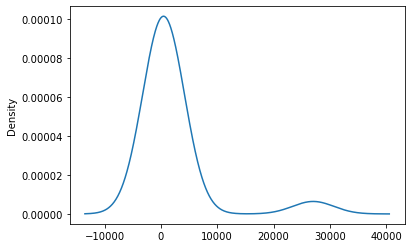

In [6]:
# Visualize the value counts of APPLICATION_TYPE
appl_type_counts.plot.density()

<AxesSubplot:ylabel='Density'>

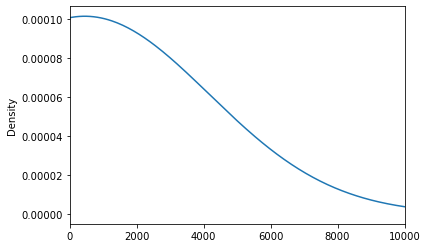

In [7]:
# Visualize the value counts of APPLICATION_TYPE
appl_type_counts.plot.density(xlim=(0,10000))

<AxesSubplot:ylabel='Density'>

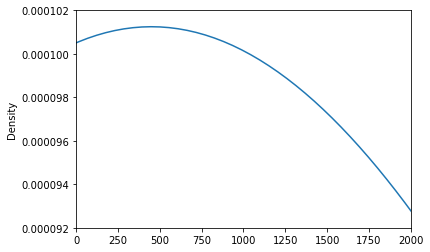

In [8]:
# Visualize the value counts of APPLICATION_TYPE
appl_type_counts.plot.density(
    xlim=(0,2000),
    ylim=(0.000092,0.000102)
)

In [9]:
appl_type_counts[appl_type_counts < 500].index

Index(['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17'], dtype='object')

In [10]:
# Determine which values to replace if counts are less than ...?
appl_type_replacements = appl_type_counts[appl_type_counts < 500].index

# Replace in dataframe
for appl in appl_type_replacements:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(appl,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
clsf_counts = application_df["CLASSIFICATION"].value_counts()

clsf_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
with pd.option_context( 'display.max_rows', None, 'display.max_columns', None ):
    print(clsf_counts.head(20))

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64


<AxesSubplot:ylabel='Density'>

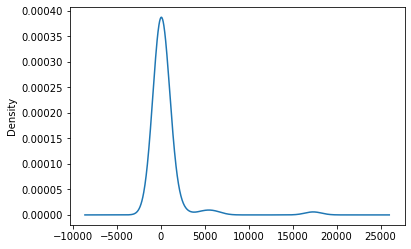

In [13]:
# Visualize the value counts of CLASSIFICATION
clsf_counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ..?
clsf_replacements = clsf_counts[clsf_counts < 1000].index

# Replace in dataframe
for clsf in clsf_replacements:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(clsf,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

### Branch Off: Optimize the Model

Optimize the model in an attempt to achieve a target predictive accuracy greater than 75% by using any or all of the following:
- Adjust the input data to ensure there are no variables or outliers causing confusion in the model. For example:
  - Drop more or fewer columns
  - Create more bins for rare occurrences in columns
  - Increase or decrease the number of values for each bin
- Add more neurons to a hidden layer
- Add more hidden layers
- Use different activation functions for the hidden layers
- Add or reduce the number of epochs in the training regimen

In [15]:
# Determine the number of missing values per column
application_df.isna().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [16]:
# Describe the 'object' fields including the percentage of top values
obj_cols = application_df.describe(include='O')

obj_cols_descr = pd.concat([
    obj_cols,
    pd.DataFrame(
        index=['freq_pct'],
        columns=obj_cols.columns,
        data=[[
            100 * obj_cols[col]["freq"] / obj_cols[col]["count"]
            for col in obj_cols.columns
        ]]
    )
])

obj_cols_descr

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
count,34299,34299,34299,34299,34299,34299,34299
unique,9,6,6,5,4,9,2
top,T3,Independent,C1000,Preservation,Trust,0,N
freq,27037,18480,17326,28095,23515,24388,34272
freq_pct,78.827371,53.879122,50.514592,81.912009,68.55885,71.104114,99.921281


Note that 78.8% of applications are `APPLICATION_TYPE` `T3`.

However, we already dealt with `APPLICATION_TYPE` and `CLASSIFICATION`, above, so leave them alone, for now.

###### Examine the `AFFILIATION` column

In [17]:
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

The low-quantity values can probably be mixed in with `Other`.

In [18]:
affiliation_counts = application_df["AFFILIATION"].value_counts()

# Determine which values to replace if counts are less than ...?
affiliation_replacements = affiliation_counts[affiliation_counts < 15000].index

# Replace in dataframe
for appl in affiliation_replacements:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(appl,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

###### Examine the `USE_CASE` column

In [19]:
application_df["USE_CASE"].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

Looks okay.

###### Examine the `ORGANIZATION` column

In [20]:
application_df["ORGANIZATION"].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

Looks okay, too. We could combine the two low-count categories, but since there are only four categories to start with, we'll leave them alone.

###### Examine the `INCOME_AMT` column

Why is `INCOME_AMT` an `object` column?

In [21]:
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

The `INCOME_AMT` values are intervals (stored as strings).

They could be converted into numeric values by assigning them to the maximum, minimum, or midpoint values of the interval. However…

71% of applications show `0` in the `INCOME_AMT` column.

Does that mean they *actually* have 0 income, or is that incomplete data (*i.e.*, should it be treated like `NaN`)?

That would be a lot of rows to ignore, if they were. Instead, we could treat the column as unreliable and remove it.

We'll try the numeric conversion option using the midpoint for the intervals (except for `50M+`, which we'll set to its minimum value).  
\[If we have to, we can always try deleting the column as a backup plan.\]

In [22]:
income_dict = {
    '0': 0,
    '1-9999': 5000,
    '10000-24999': 7500,
    '25000-99999': 37500,
    '100000-499999': 200000,
    '1M-5M': 2000000,
    '5M-10M': 2500000,
    '10M-50M': 20000000,
    '50M+': 50000000
}

income_dict

{'0': 0,
 '1-9999': 5000,
 '10000-24999': 7500,
 '25000-99999': 37500,
 '100000-499999': 200000,
 '1M-5M': 2000000,
 '5M-10M': 2500000,
 '10M-50M': 20000000,
 '50M+': 50000000}

In [23]:
application_df.INCOME_AMT = application_df.INCOME_AMT.map(income_dict)

In [24]:
application_df.INCOME_AMT.value_counts().sort_index()

0           24388
5000          728
7500          543
37500        3747
200000       3374
2000000       955
2500000       185
20000000      240
50000000      139
Name: INCOME_AMT, dtype: int64

In [25]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,5000,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,7500,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,200000,N,142590,1


###### Examine the `SPECIAL_CONSIDERATIONS` column

*Very* few (less than 0.1% of) applications have `SPECIAL_CONSIDERATIONS` `1`, so it probably should not be used in the neural-net's input features.

In [26]:
application_df.drop(
    columns=["SPECIAL_CONSIDERATIONS"],
    errors="ignore",
    inplace=True
)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,5000,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,7500,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,200000,142590,1


###### Examine the numeric columns

In [27]:
application_df.describe()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,3.429900e+04,34299.000000
mean,0.999854,4.357423e+05,2.769199e+06,0.532406
std,0.012073,3.590276e+06,8.713045e+07,0.498956
min,0.000000,0.000000e+00,5.000000e+03,0.000000
25%,1.000000,0.000000e+00,5.000000e+03,0.000000
50%,1.000000,0.000000e+00,5.000000e+03,1.000000
75%,1.000000,3.750000e+04,7.742000e+03,1.000000
max,1.000000,5.000000e+07,8.597806e+09,1.000000


Notice:
- At least three-quarters of the values in the `STATUS` column are `1`s.  
- At least half the values in the `ASK_AMT` column are $5,000 or less.

###### Examine the `STATUS` column:

In [28]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

Well *that's* not going to be a very helpful indicator!

Is there anything special about the rows with `0` in the `STATUS` column?

In [29]:
application_df.loc[application_df["STATUS"] == 0]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
2816,T3,CompanySponsored,C2000,CommunityServ,Trust,0,0,5000,1
2928,T3,Independent,C1000,Preservation,Trust,0,37500,7287,1
10155,T3,Independent,C1000,Preservation,Trust,0,7500,5000,1
20518,T3,CompanySponsored,C2100,CommunityServ,Association,0,0,5000,0
29590,T3,Independent,C1000,Preservation,Association,0,0,5000,0


`APPLICATION_TYPE`s are all `T3` (not terribly surprising).

`ASK_AMT`s are all similar.

In the `ORGANIZATION` column: all `Trust`s were successful; neither `Association` was.

All-in-all, `STATUS` also seems like a not-very-useful column.

In [30]:
application_df.drop(
    columns=["STATUS"],
    errors="ignore",
    inplace=True
)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,5000,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,7500,6692,1
4,T3,Independent,C1000,Heathcare,Trust,200000,142590,1


###### Examine the `ASK_AMT` column:

In [31]:
application_df["ASK_AMT"].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

**Huge** count difference between `5000` and any other value.

In [32]:
# What are the top 20 and bottom 20 *unique* `ASK_AMT` values?
ask_vals = sorted(application_df["ASK_AMT"].drop_duplicates())

print(ask_vals[:20])
print(ask_vals[-20:])

[5000, 5001, 5006, 5016, 5037, 5040, 5044, 5050, 5052, 5058, 5059, 5064, 5073, 5112, 5113, 5114, 5130, 5133, 5147, 5149]
[967076877, 988114720, 1011585213, 1068119241, 1128874990, 1281905997, 1326447551, 1382280715, 1391441555, 1420537175, 1665460552, 1736232349, 1893400128, 2264109450, 2310256039, 3391919220, 4653011914, 5591584994, 8556638692, 8597806340]


Hmm… not particularly enlightening, and there is a *huge* difference between the lowest and highest valued. So…

In [33]:
# How many `ASK_AMT` values are in each order of magnitude?
import math

application_df["ASK_AMT"].map(math.log10).map(int).value_counts()

3    25946
4     3820
5     2956
6     1165
7      311
8       83
9       18
Name: ASK_AMT, dtype: int64

That looks like it could be a useful transformation!

In [34]:
application_df["ASK_AMT"] = application_df["ASK_AMT"].map(math.log10).map(int)

In [35]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,3,1
1,T3,Independent,C2000,Preservation,Co-operative,5000,5,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,3,0
3,T3,CompanySponsored,C2000,Preservation,Trust,7500,3,1
4,T3,Independent,C1000,Heathcare,Trust,200000,5,1


### Merge from Deliverables 1 & 2

In [36]:
# Generate our categorical variable lists
application_cat = application_df.select_dtypes('object').columns.tolist()

application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION']

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(
                enc.fit_transform(application_df[application_cat])
            )

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)

encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)

application_df.head()

,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,5000,5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,7500,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,200000,5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

In [40]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Take 1

### Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
nodes_layer1 = 80
nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation="relu"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2400      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [44]:
checkpoint_dir = os.path.join("..","checkpoints")
checkpoint_filename = ""
checkpoint_path = ""

In [45]:
def set_cp_tgts(n):
    # `global` allows the function to assign values to variables defined outside its scope
    global checkpoint_filename
    global checkpoint_path
    checkpoint_filename = "D3.weights_" + str(n) + ".{epoch:03d}.hdf5"
    checkpoint_path = os.path.join(checkpoint_dir,checkpoint_filename)
    os.makedirs(checkpoint_dir,exist_ok=True)

In [46]:
set_cp_tgts(1)

In [47]:
# Verify that the above values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_1.{epoch:03d}.hdf5
..\checkpoints\D3.weights_1.{epoch:03d}.hdf5


In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [49]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

In [50]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5664 - accuracy: 0.7236
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7298
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5496 - accuracy: 0.7323
Epoch 5/100
795/804 [============================>.] - ETA: 0s - loss: 0.5489 - accuracy: 0.7328
Epoch 5: saving model to ..\checkpoints\D3.weights_1.005.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7340
Epoch 9/100
804/804 [========================

804/804 [==============================] - 2s 3ms/step - loss: 0.5389 - accuracy: 0.7396
Epoch 65/100
800/804 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7380
Epoch 65: saving model to ..\checkpoints\D3.weights_1.065.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7379
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5385 - accuracy: 0.7379
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5388 - accuracy: 0.7383
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5383 - accuracy: 0.7392
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7393
Epoch 70/100
802/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7394
Epoch 70: saving model to ..\checkpoints\D3.weights_1.070.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5385 - accuracy: 0.7394
Epo

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5618 - accuracy: 0.7264 - 408ms/epoch - 2ms/step
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

### Take 2: Add Nodes

In [52]:
set_cp_tgts(2)

# Verify that the values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_2.{epoch:03d}.hdf5
..\checkpoints\D3.weights_2.{epoch:03d}.hdf5


### Compile, Train and Evaluate the Model

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
# nodes_layer1 = 80
nodes_layer1 = 90
# nodes_layer2 = 30
nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation="relu"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
print(f"Features: {num_feat}",end='\n\n')
nn.summary()

Features: 29

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 90)                2700      
                                                                 
 dense_4 (Dense)             (None, 40)                3640      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,381
Trainable params: 6,381
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [55]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

In [56]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5647 - accuracy: 0.7222
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7295
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7309
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.7316
Epoch 5: saving model to ..\checkpoints\D3.weights_2.005.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7316
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7320
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7328
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7326
Epoch 9/100
804/804 [========================

804/804 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7392
Epoch 65/100
768/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7384
Epoch 65: saving model to ..\checkpoints\D3.weights_2.065.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7394
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7406
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7396
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7407
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5371 - accuracy: 0.7400
Epoch 70/100
785/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7392
Epoch 70: saving model to ..\checkpoints\D3.weights_2.070.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7392
Epo

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5614 - accuracy: 0.7248 - 414ms/epoch - 2ms/step
Loss: 0.5614356398582458, Accuracy: 0.724781334400177


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

Take 2:  
Loss: 0.5614356398582458, Accuracy: 0.724781334400177  
Again, slightly better than the original, but not as good as Take 1.

### Take 3: Add a Layer

In [58]:
set_cp_tgts(3)

# Verify that the values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_3.{epoch:03d}.hdf5
..\checkpoints\D3.weights_3.{epoch:03d}.hdf5


### Compile, Train and Evaluate the Model

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
nodes_layer1 = 80
nodes_layer2 = 30
nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation="relu"
    )
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer3,
        activation="relu"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
print(f"Features: {num_feat}",end='\n\n')
nn.summary()

Features: 29

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2400      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [61]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

In [62]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5655 - accuracy: 0.7250
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5527 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7332
Epoch 5/100
804/804 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.7332
Epoch 5: saving model to ..\checkpoints\D3.weights_3.005.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7332
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7339
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7348
Epoch 9/100
804/804 [========================

804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7399
Epoch 65/100
788/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7395
Epoch 65: saving model to ..\checkpoints\D3.weights_3.065.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5383 - accuracy: 0.7400
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7405
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7406
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5375 - accuracy: 0.7407
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7401
Epoch 70/100
801/804 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7394
Epoch 70: saving model to ..\checkpoints\D3.weights_3.070.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7396
Epo

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5635 - accuracy: 0.7221 - 377ms/epoch - 1ms/step
Loss: 0.5634746551513672, Accuracy: 0.7220991253852844


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

Take 2:  
Loss: 0.5614356398582458, Accuracy: 0.724781334400177  
Again, slightly better than the original, but not as good as Take 1.

Take 3:  
Loss: 0.5634746551513672, Accuracy: 0.7220991253852844  
The worst, yet.

### Take 4: Change Activation Function

In [64]:
set_cp_tgts(4)

# Verify that the values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_4.{epoch:03d}.hdf5
..\checkpoints\D3.weights_4.{epoch:03d}.hdf5


### Compile, Train and Evaluate the Model

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
nodes_layer1 = 80
nodes_layer2 = 30
act_func = "tanh"

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation=act_func
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation=act_func
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
print(f"Features: {num_feat}",end='\n\n')
nn.summary()

Features: 29

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                2400      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [67]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

In [68]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5702 - accuracy: 0.7221
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7328
Epoch 5/100
790/804 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7305
Epoch 5: saving model to ..\checkpoints\D3.weights_4.005.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7320
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7331
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.7327
Epoch 9/100
804/804 [========================

804/804 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.7409
Epoch 65/100
769/804 [===========================>..] - ETA: 0s - loss: 0.5348 - accuracy: 0.7405
Epoch 65: saving model to ..\checkpoints\D3.weights_4.065.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7395
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7399
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7406
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7407
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.7414
Epoch 70/100
780/804 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7407
Epoch 70: saving model to ..\checkpoints\D3.weights_4.070.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7405
Epo

In [69]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5598 - accuracy: 0.7241 - 376ms/epoch - 1ms/step
Loss: 0.559809684753418, Accuracy: 0.7240816354751587


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

Take 2:  
Loss: 0.5614356398582458, Accuracy: 0.724781334400177  
Again, slightly better than the original, but not as good as Take 1.

Take 3:  
Loss: 0.5634746551513672, Accuracy: 0.7220991253852844  
The worst, yet.

Take 4:  
Loss: 0.559809684753418, Accuracy: 0.7240816354751587  
Better than Take 3 (but that's not saying much).

### Take 5: Multiple Changes

In [73]:
set_cp_tgts(5)

# Verify that the values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_5.{epoch:03d}.hdf5
..\checkpoints\D3.weights_5.{epoch:03d}.hdf5


### Compile, Train and Evaluate the Model

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
nodes_layer1 = 60
nodes_layer2 = 30
nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation="tanh"
    )
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer3,
        activation="tanh"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
print(f"Features: {num_feat}",end='\n\n')
nn.summary()

Features: 29

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 60)                1800      
                                                                 
 dense_14 (Dense)            (None, 30)                1830      
                                                                 
 dense_15 (Dense)            (None, 5)                 155       
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 3,791
Trainable params: 3,791
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [76]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

In [77]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5708 - accuracy: 0.7192
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7293
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7329
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7327
Epoch 5/100
778/804 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7332
Epoch 5: saving model to ..\checkpoints\D3.weights_5.005.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7328
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7338
Epoch 9/100
804/804 [========================

804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7398
Epoch 65/100
787/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7400
Epoch 65: saving model to ..\checkpoints\D3.weights_5.065.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7400
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7397
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7380
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5369 - accuracy: 0.7398
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7399
Epoch 70/100
776/804 [===========================>..] - ETA: 0s - loss: 0.5344 - accuracy: 0.7407
Epoch 70: saving model to ..\checkpoints\D3.weights_5.070.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7393
Epo

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5584 - accuracy: 0.7234 - 390ms/epoch - 1ms/step
Loss: 0.5584114789962769, Accuracy: 0.7233819365501404


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

Take 2:  
Loss: 0.5614356398582458, Accuracy: 0.724781334400177  
Again, slightly better than the original, but not as good as Take 1.

Take 3:  
Loss: 0.5634746551513672, Accuracy: 0.7220991253852844  
The worst, yet.

Take 4:  
Loss: 0.559809684753418, Accuracy: 0.7240816354751587  
Better than Take 3 (but that's not saying much).

Take 5:  
Loss: 0.5584114789962769, Accuracy: 0.7233819365501404  
Not going anywhere, apparently.

### Take 5: Extreme Value Changes

In [83]:
set_cp_tgts(6)

# Verify that the values were set properly
print(checkpoint_dir)
print(checkpoint_filename)
print(checkpoint_path)

..\checkpoints
D3.weights_6.{epoch:03d}.hdf5
..\checkpoints\D3.weights_6.{epoch:03d}.hdf5


### Compile, Train and Evaluate the Model

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_feat = X_train.shape[1]
nodes_layer1 = 1000
nodes_layer2 = 300
nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        input_dim=num_feat,
        units=nodes_layer1,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer2,
        activation="tanh"
    )
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=nodes_layer3,
        activation="tanh"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
print(f"Features: {num_feat}",end='\n\n')
nn.summary()

Features: 29

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1000)              30000     
                                                                 
 dense_18 (Dense)            (None, 300)               300300    
                                                                 
 dense_19 (Dense)            (None, 50)                15050     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 345,401
Trainable params: 345,401
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compile the model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [86]:
# Create a callback that saves the model's weights every epoch
cp_callback   = ModelCheckpoint(
                    filepath=checkpoint_path,
                    verbose=1,
                    save_weights_only=True,
                    save_freq='epoch',
                    period=5
                )

This could take a while.

In [87]:
# Train the model
fit_model = nn.fit(
                X_train_scaled,
                y_train,
                epochs=100,
                callbacks=cp_callback
            )

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5681 - accuracy: 0.7201
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5575 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5549 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5532 - accuracy: 0.7278
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7294
Epoch 5: saving model to ..\checkpoints\D3.weights_6.005.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5537 - accuracy: 0.7297
Epoch 6/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5520 - accuracy: 0.7298
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5508 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5515 - accuracy: 0.7298
Epoch 9/100
804/804 [========================

804/804 [==============================] - 4s 5ms/step - loss: 0.5413 - accuracy: 0.7361
Epoch 65/100
802/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7364
Epoch 65: saving model to ..\checkpoints\D3.weights_6.065.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5414 - accuracy: 0.7364
Epoch 66/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5413 - accuracy: 0.7388
Epoch 67/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5406 - accuracy: 0.7380
Epoch 68/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5411 - accuracy: 0.7378
Epoch 69/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5408 - accuracy: 0.7375
Epoch 70/100
797/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7375
Epoch 70: saving model to ..\checkpoints\D3.weights_6.070.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5406 - accuracy: 0.7372
Epo

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate( X_test_scaled, y_test, verbose=2 )
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5590 - accuracy: 0.7256 - 532ms/epoch - 2ms/step
Loss: 0.5590086579322815, Accuracy: 0.7255976796150208


Take 0 (the original from Deliverable 2):  
Loss: 0.5791323781013489, Accuracy: 0.7244315147399902

Take 1:  
Loss: 0.5617912411689758, Accuracy: 0.7264139652252197  
Just slightly better than the original.

Take 2:  
Loss: 0.5614356398582458, Accuracy: 0.724781334400177  
Again, slightly better than the original, but not as good as Take 1.

Take 3:  
Loss: 0.5634746551513672, Accuracy: 0.7220991253852844  
The worst, yet.

Take 4:  
Loss: 0.559809684753418, Accuracy: 0.7240816354751587  
Better than Take 3 (but that's not saying much).

Take 5:  
Loss: 0.5584114789962769, Accuracy: 0.7233819365501404  
Not going anywhere, apparently.

Take 6:  
Loss: 0.5590086579322815, Accuracy: 0.7255976796150208  
Hmm…

In [89]:
model_dir = os.path.join("..","models")
model_filename = "AlphabetSoupCharity_Optimization.h5"

model_path = os.path.join(model_dir,model_filename)

In [90]:
os.makedirs(model_dir,exist_ok=True)

In [91]:
# Export the now-trained model to an HDF5 file
nn.save(model_path)